In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [ ]:
df = load_diabetes()
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
df_X = df['data']
df_y = df['target']

type(df_X), type(df_y), df_X.shape, df_y.shape

(numpy.ndarray, numpy.ndarray, (442, 10), (442,))

In [ ]:
df_y[:3]

array([151.,  75., 141.])

In [ ]:
train_x , test_x, train_y,  test_y = train_test_split(df_X, df_y, test_size = 0.2, random_state = 23 )
train_x.shape, test_x.shape

((353, 10), (89, 10))

In [ ]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
LEARNING_RATE = 1

In [ ]:
losses = []

for i in range(1, 100001):
    dW, db = gradient(train_x, W, b, train_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(train_x, W, b, train_y)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 2804.6959
Iteration 20000 : Loss 2796.4191
Iteration 30000 : Loss 2792.4116
Iteration 40000 : Loss 2790.4712
Iteration 50000 : Loss 2789.5316
Iteration 60000 : Loss 2789.0767
Iteration 70000 : Loss 2788.8565
Iteration 80000 : Loss 2788.7498
Iteration 90000 : Loss 2788.6982
Iteration 100000 : Loss 2788.6732


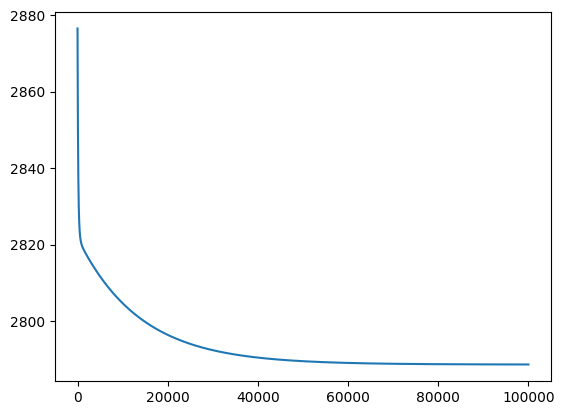

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
prediction = model(test_x, W, b)
mse = loss(test_x, W, b, test_y)
mse

3169.736019543623

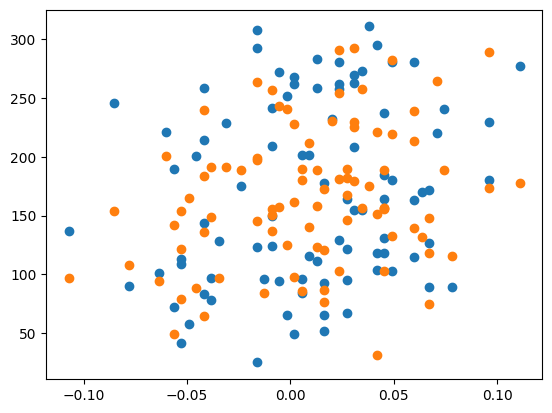

In [ ]:
plt.scatter(test_x[:, 0], test_y)
plt.scatter(test_x[:, 0], prediction)
plt.show()

In [ ]:
test_x[:1, ]

array([[ 0.02354575, -0.04464164,  0.11019775,  0.0631866 ,  0.01356652,
        -0.03294187, -0.02499266,  0.02065544,  0.09924058,  0.02377494]])